# Predicting Customer Purchases

Dataset: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset/data

## Data Preprocessing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
customer = pd.read_csv("customer_purchase_data.csv")
df = customer.copy()

In [3]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,44.298667,15.537259,18.000000,31.000000,45.000000,57.000000,70.000000
Gender,1500.0,0.504667,0.500145,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1500.0,84249.164338,37629.493078,20001.512518,53028.979155,83699.581476,117167.772858,149785.176481
NumberOfPurchases,1500.0,10.420000,5.887391,0.000000,5.000000,11.000000,15.000000,20.000000
ProductCategory,1500.0,2.012667,1.428005,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1500.0,30.469040,16.984392,1.037023,16.156700,30.939516,44.369863,59.991105
LoyaltyProgram,1500.0,0.326667,0.469151,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1500.0,2.555333,1.705152,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1500.0,0.432000,0.495520,0.000000,0.000000,0.000000,1.000000,1.000000


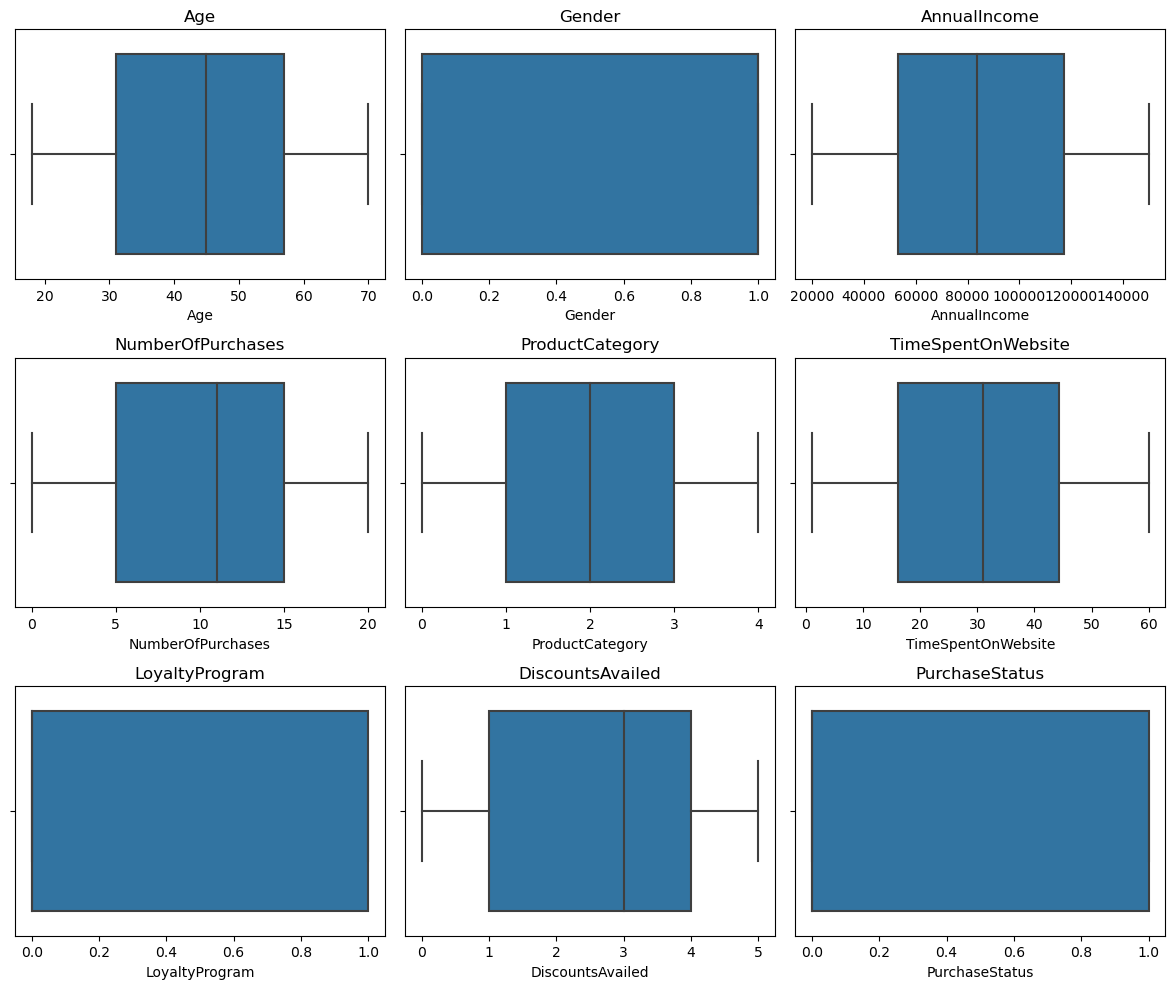

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(column)
    
plt.tight_layout()
plt.show()

In [7]:
# There are no outliers as it seems.

### Feature Engineering

In [8]:
df['TimePerPurchase'] = df.apply(lambda row: row['TimeSpentOnWebsite'] / row['NumberOfPurchases'] if row['NumberOfPurchases'] != 0 else 0, axis=1)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1500.0,44.298667,15.537259,18.000000,31.000000,45.000000,57.000000,70.000000
Gender,1500.0,0.504667,0.500145,0.000000,0.000000,1.000000,1.000000,1.000000
AnnualIncome,1500.0,84249.164338,37629.493078,20001.512518,53028.979155,83699.581476,117167.772858,149785.176481
NumberOfPurchases,1500.0,10.420000,5.887391,0.000000,5.000000,11.000000,15.000000,20.000000
ProductCategory,1500.0,2.012667,1.428005,0.000000,1.000000,2.000000,3.000000,4.000000
TimeSpentOnWebsite,1500.0,30.469040,16.984392,1.037023,16.156700,30.939516,44.369863,59.991105
LoyaltyProgram,1500.0,0.326667,0.469151,0.000000,0.000000,0.000000,1.000000,1.000000
DiscountsAvailed,1500.0,2.555333,1.705152,0.000000,1.000000,3.000000,4.000000,5.000000
PurchaseStatus,1500.0,0.432000,0.495520,0.000000,0.000000,0.000000,1.000000,1.000000
TimePerPurchase,1500.0,4.737535,6.826194,0.000000,1.368855,2.792254,5.075028,59.880670


## Analyzing Relationships

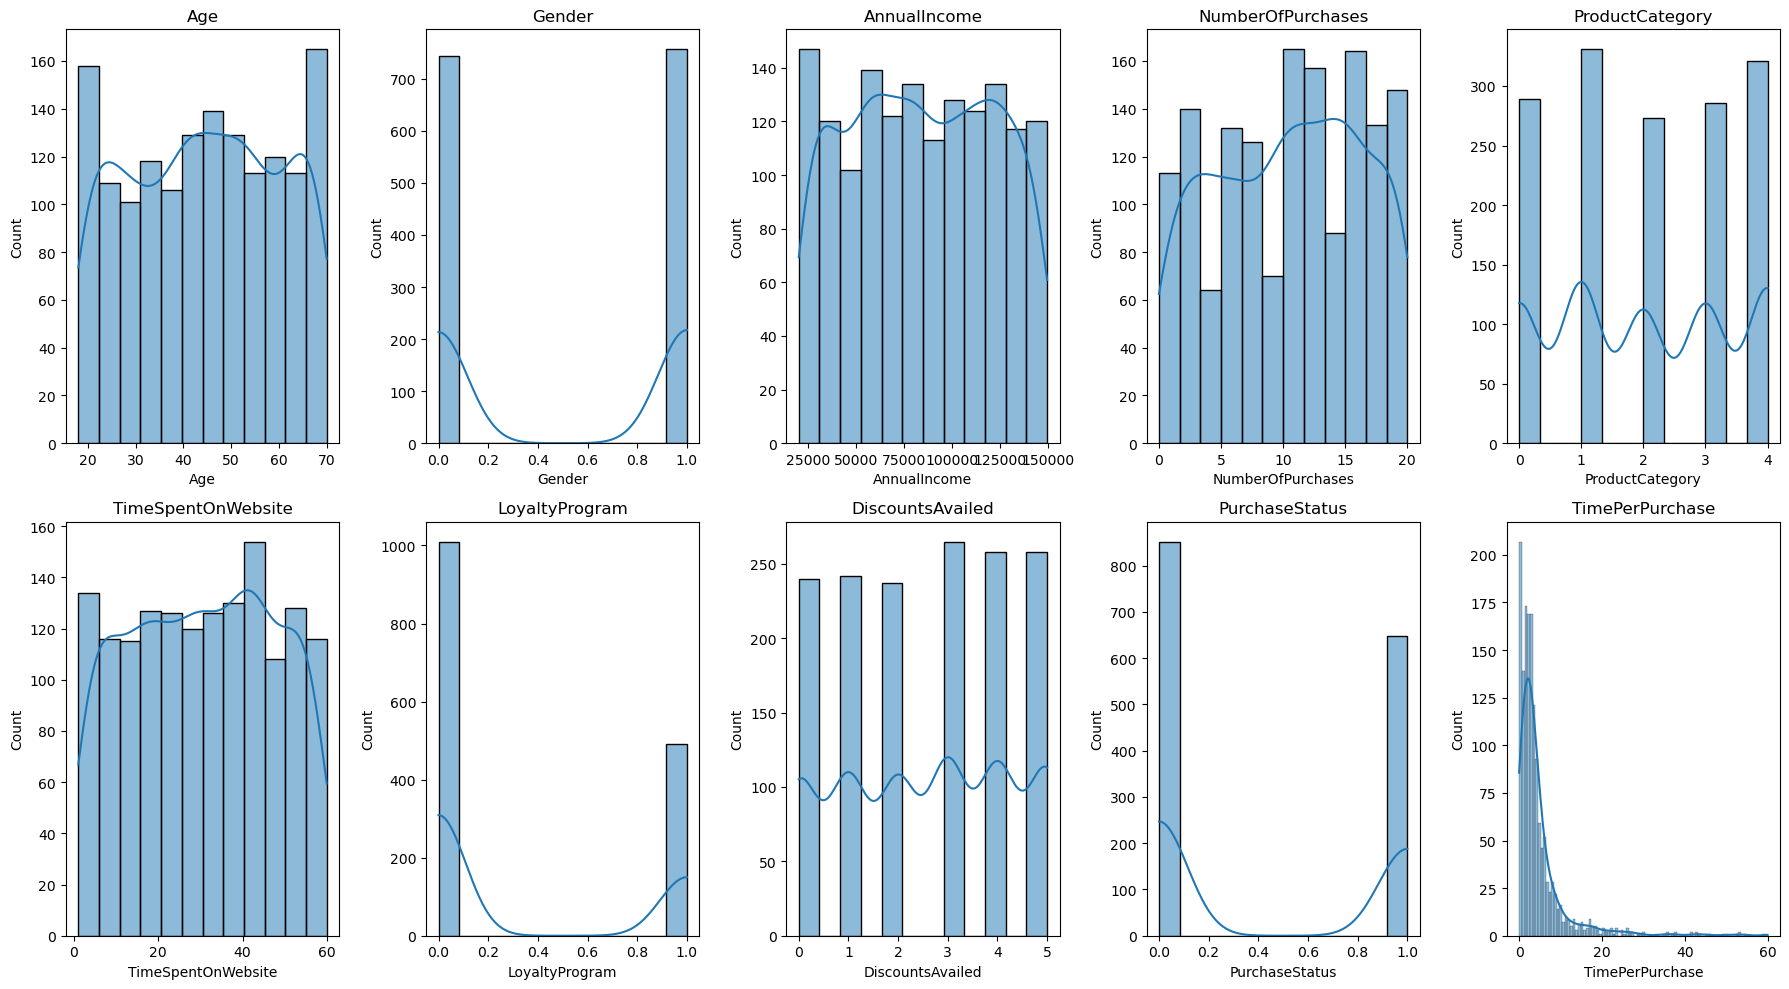

In [10]:
fig, axes = plt.subplots(2, 5, figsize=(18, 10))

axes = axes.flatten()

for i, column in enumerate(df.columns):
    sns.histplot(df[column], kde=True, ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

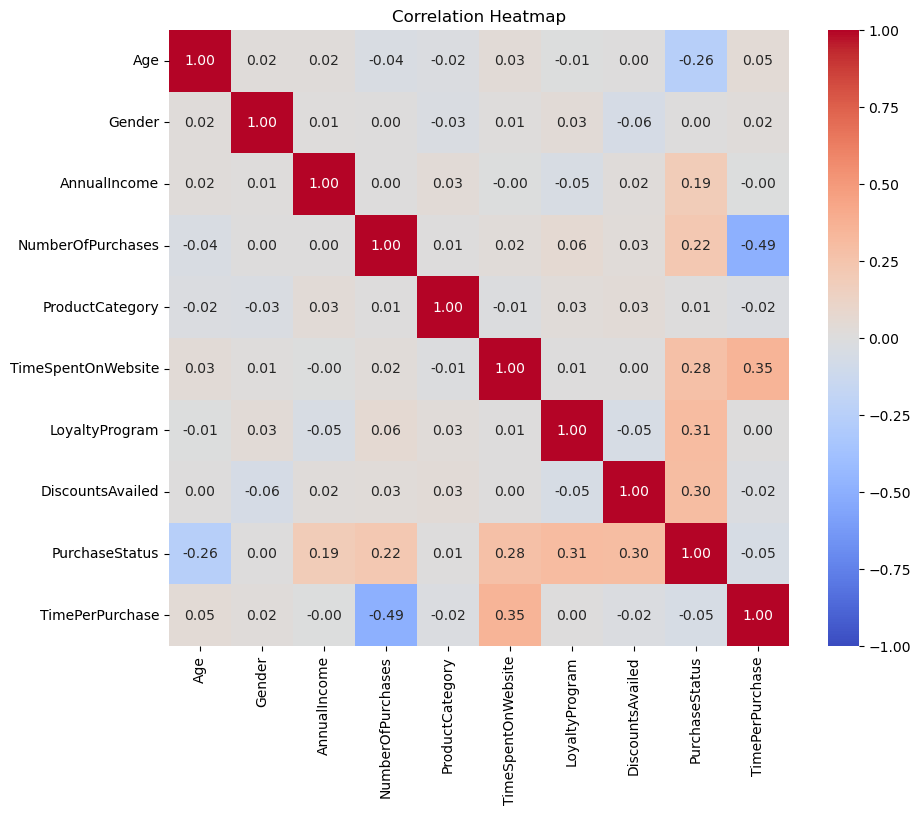

In [11]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
corr_purchase = corr_matrix["PurchaseStatus"].sort_values(ascending=False)
corr_purchase

PurchaseStatus        1.000000
LoyaltyProgram        0.310838
DiscountsAvailed      0.303297
TimeSpentOnWebsite    0.277112
NumberOfPurchases     0.222691
AnnualIncome          0.188214
ProductCategory       0.007346
Gender                0.002627
TimePerPurchase      -0.052300
Age                  -0.255747
Name: PurchaseStatus, dtype: float64

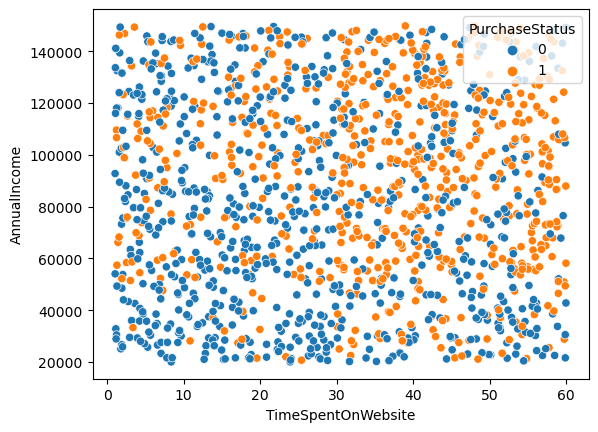

In [13]:
sns.scatterplot(data=df, x="TimeSpentOnWebsite", y="AnnualIncome", hue="PurchaseStatus")
plt.show()

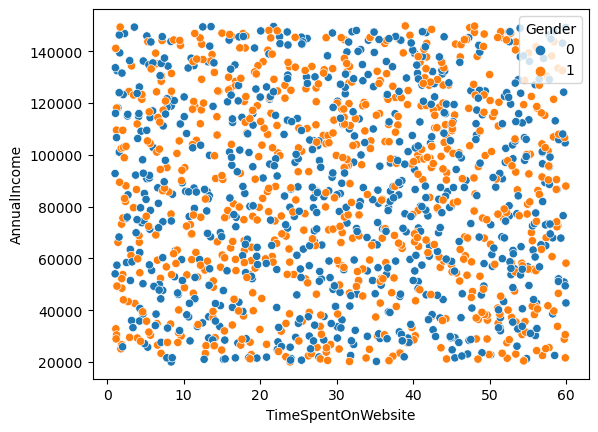

In [14]:
sns.scatterplot(data=df, x="TimeSpentOnWebsite", y="AnnualIncome", hue="Gender")
plt.show()

## Modeling

In [15]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [16]:
y = df["PurchaseStatus"]
X = df.drop(columns=["PurchaseStatus"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rf_model = RandomForestClassifier(random_state=42)

In [20]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [21]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, 
                           cv=10, scoring='accuracy', n_jobs=-1, verbose=2)

In [22]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [23]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Best Score:  0.9333517699115044


In [24]:
best_rf_model = RandomForestClassifier(**best_params, random_state=42)
best_rf_model.fit(X_train, y_train)

y_pred_rf = best_rf_model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred_rf)

0.9493333333333334

In [26]:
confusion_matrix(y_test, y_pred_rf)

array([[213,   4],
       [ 15, 143]], dtype=int64)

In [27]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       217
           1       0.97      0.91      0.94       158

    accuracy                           0.95       375
   macro avg       0.95      0.94      0.95       375
weighted avg       0.95      0.95      0.95       375



In [28]:
# Cross Validation

In [29]:
best_rf_scores = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring="accuracy")

In [30]:
print("Random Forest Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_rf_scores.mean(), best_rf_scores.std()))

Random Forest Cross-Validation Accuracy: 0.93 (+/- 0.02)


### Gradient Boosting (CatBoost)

In [31]:
from catboost import CatBoostClassifier

In [32]:
catb_model = CatBoostClassifier()

In [33]:
param_grid = {
    "iterations": [100, 200, 300],
    "learning_rate": [0.01, 0.1, 0.2],
    "depth": [4, 6, 8],
    "border_count": [32, 50, 100]
}

In [34]:
grid_search = GridSearchCV(catb_model, param_grid, cv=10, scoring="accuracy", n_jobs=-1, verbose=2)

In [35]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 81 candidates, totalling 810 fits
0:	learn: 0.6812605	total: 140ms	remaining: 27.9s
1:	learn: 0.6715362	total: 143ms	remaining: 14.1s
2:	learn: 0.6640452	total: 144ms	remaining: 9.47s
3:	learn: 0.6528449	total: 145ms	remaining: 7.12s
4:	learn: 0.6436340	total: 146ms	remaining: 5.71s
5:	learn: 0.6325203	total: 148ms	remaining: 4.77s
6:	learn: 0.6241332	total: 148ms	remaining: 4.09s
7:	learn: 0.6147483	total: 149ms	remaining: 3.58s
8:	learn: 0.6072730	total: 150ms	remaining: 3.18s
9:	learn: 0.5996531	total: 151ms	remaining: 2.87s
10:	learn: 0.5925371	total: 152ms	remaining: 2.61s
11:	learn: 0.5859516	total: 153ms	remaining: 2.39s
12:	learn: 0.5773419	total: 153ms	remaining: 2.21s
13:	learn: 0.5688347	total: 154ms	remaining: 2.05s
14:	learn: 0.5609191	total: 155ms	remaining: 1.91s
15:	learn: 0.5522311	total: 156ms	remaining: 1.79s
16:	learn: 0.5453809	total: 157ms	remaining: 1.69s
17:	learn: 0.5360958	total: 157ms	remaining: 1.59s
18:	learn: 0.5273384	total: 1

GridSearchCV(cv=10,
             estimator=<catboost.core.CatBoostClassifier object at 0x00000232F5076C50>,
             n_jobs=-1,
             param_grid={'border_count': [32, 50, 100], 'depth': [4, 6, 8],
                         'iterations': [100, 200, 300],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='accuracy', verbose=2)

In [36]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

Best Parameters:  {'border_count': 50, 'depth': 6, 'iterations': 200, 'learning_rate': 0.01}
Best Score:  0.9457569532237674


In [37]:
best_catb_model = CatBoostClassifier(**best_params)
best_catb_model.fit(X_train, y_train)

y_pred_catb = best_catb_model.predict(X_test)

0:	learn: 0.6812605	total: 1.13ms	remaining: 225ms
1:	learn: 0.6715362	total: 2.09ms	remaining: 207ms
2:	learn: 0.6640452	total: 2.9ms	remaining: 191ms
3:	learn: 0.6528449	total: 3.71ms	remaining: 182ms
4:	learn: 0.6436340	total: 4.53ms	remaining: 177ms
5:	learn: 0.6325203	total: 5.48ms	remaining: 177ms
6:	learn: 0.6241332	total: 6.39ms	remaining: 176ms
7:	learn: 0.6147483	total: 7.31ms	remaining: 175ms
8:	learn: 0.6072730	total: 8.2ms	remaining: 174ms
9:	learn: 0.5996531	total: 9.03ms	remaining: 172ms
10:	learn: 0.5925371	total: 9.97ms	remaining: 171ms
11:	learn: 0.5859516	total: 10.8ms	remaining: 168ms
12:	learn: 0.5773419	total: 11.7ms	remaining: 168ms
13:	learn: 0.5688347	total: 12.5ms	remaining: 166ms
14:	learn: 0.5609191	total: 13.4ms	remaining: 165ms
15:	learn: 0.5522311	total: 14.3ms	remaining: 165ms
16:	learn: 0.5453809	total: 15.2ms	remaining: 163ms
17:	learn: 0.5360958	total: 16ms	remaining: 162ms
18:	learn: 0.5273384	total: 16.9ms	remaining: 161ms
19:	learn: 0.5190964	total

In [38]:
accuracy_score(y_test, y_pred_catb)

0.9413333333333334

In [39]:
confusion_matrix(y_test, y_pred_catb)

array([[210,   7],
       [ 15, 143]], dtype=int64)

In [40]:
print(classification_report(y_test, y_pred_catb))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       217
           1       0.95      0.91      0.93       158

    accuracy                           0.94       375
   macro avg       0.94      0.94      0.94       375
weighted avg       0.94      0.94      0.94       375



### KNN

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5) # Let's try 5 neighbors

In [19]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
y_pred_knn = knn_model.predict(X_test)

In [21]:
accuracy_score(y_test, y_pred_knn)

0.6053333333333333

In [22]:
confusion_matrix(y_test, y_pred_knn)

array([[144,  73],
       [ 75,  83]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.66      0.66      0.66       217
           1       0.53      0.53      0.53       158

    accuracy                           0.61       375
   macro avg       0.59      0.59      0.59       375
weighted avg       0.60      0.61      0.60       375



In [24]:
# We've got a bad score, let's try to improve it by adjusting the parameters.

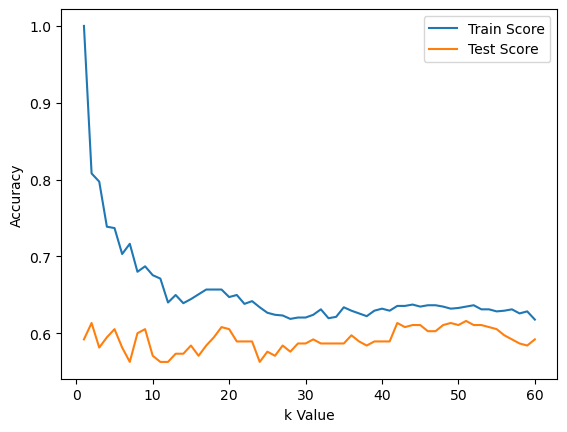

In [25]:
import matplotlib.pyplot as plt

k_range = range(1, 61)
train_scores = []
test_scores = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.plot(k_range, train_scores, label='Train Score')
plt.plot(k_range, test_scores, label='Test Score')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [44]:
param_grid = {
    "n_neighbors": [43],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2]
}

In [45]:
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, 
                           cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

In [46]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [43], 'p': [1, 2]},
             scoring='accuracy', verbose=2)

In [47]:
best_params = grid_search.best_params_
best_params

{'algorithm': 'auto', 'n_neighbors': 43, 'p': 1}

In [48]:
best_knn_model = grid_search.best_estimator_

In [49]:
y_pred_best_knn = best_knn_model.predict(X_test)

In [50]:
accuracy_score(y_test, y_pred_best_knn)

0.608

In [51]:
# Cross Validation

In [52]:
best_knn_scores = cross_val_score(best_knn_model, X_train, y_train, cv=10, scoring="accuracy")

In [53]:
print("KNN Cross-Validation Accuracy: %0.2f (+/- %0.2f)" % (best_knn_scores.mean(), best_knn_scores.std()))

KNN Cross-Validation Accuracy: 0.61 (+/- 0.04)


### Overfitting Check

In [60]:
train_score_rf = accuracy_score(y_train, best_rf_model.predict(X_train))
test_score_rf = accuracy_score(y_test, best_rf_model.predict(X_test))

print("RF Train Score: ", train_score_rf)
print("RF Test Score: ", test_score_rf)

RF Train Score:  0.9848888888888889
RF Test Score:  0.9493333333333334


In [61]:
train_score_catb = accuracy_score(y_train, best_catb_model.predict(X_train))
test_score_catb = accuracy_score(y_test, best_catb_model.predict(X_test))

print("CatBoost Train Score: ", train_score_catb)
print("CatBoost Test Score: ", test_score_catb)

CatBoost Train Score:  0.9502222222222222
CatBoost Test Score:  0.9413333333333334


In [55]:
train_score_knn = accuracy_score(y_train, best_knn_model.predict(X_train))
test_score_knn = accuracy_score(y_test, best_knn_model.predict(X_test))

print("KNN Train Score: ", train_score_knn)
print("KNN Test Score: ", test_score_knn)

KNN Train Score:  0.6373333333333333
KNN Test Score:  0.608
